# Briana Nguyen - MAT SCI 199 Reserch

In [1]:
import vasp_to_input as vi
import matplotlib.pyplot as plt
from contextlib import chdir

## Runtimes of SCF and XSpectra

In [2]:
# create input files
with chdir("XANES/data/aC261/"):
    vi.scf_input("d1.5_11.vasp", "aC1", ["C_PBE_TM_2pj.UPF", "Ch_PBE_TM_2pj.UPF"], absorbing_atom_type='C', absorbing_atom_index=0, 
        pseudo_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/pseudo/', out_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/',
        tot_charge=1, ecutwfc=20)
    vi.scf_input("d1.5_12.vasp", "aC2", ["C_PBE_TM_2pj.UPF", "Ch_PBE_TM_2pj.UPF"], absorbing_atom_type='C', absorbing_atom_index=0, 
        pseudo_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/pseudo/', out_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/',
        tot_charge=1, ecutwfc=20)
    vi.scf_input("d1.5_13.vasp", "aC3", ["C_PBE_TM_2pj.UPF", "Ch_PBE_TM_2pj.UPF"], absorbing_atom_type='C', absorbing_atom_index=0, 
        pseudo_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/pseudo/', out_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/',
        tot_charge=1, ecutwfc=20)
    vi.scf_input("d2.0_2.vasp", "aC4", ["C_PBE_TM_2pj.UPF", "Ch_PBE_TM_2pj.UPF"], absorbing_atom_type='C', absorbing_atom_index=0, 
        pseudo_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/pseudo/', out_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/',
        tot_charge=1, ecutwfc=20)
    vi.scf_input("d2.5_5.vasp", "aC5", ["C_PBE_TM_2pj.UPF", "Ch_PBE_TM_2pj.UPF"], absorbing_atom_type='C', absorbing_atom_index=0, 
        pseudo_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/pseudo/', out_directory= '/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/',
        tot_charge=1, ecutwfc=20)
    
    vi.xspectra_input("aC1.wfc", "aC1", absorbing_atom_index=2, out_directory='/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/', xemin=-10, xemax=30)
    vi.xspectra_input("aC2.wfc", "aC2", absorbing_atom_index=2, out_directory='/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/', xemin=-10, xemax=30)
    vi.xspectra_input("aC3.wfc", "aC3", absorbing_atom_index=2, out_directory='/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/', xemin=-10, xemax=30)
    vi.xspectra_input("aC4.wfc", "aC4", absorbing_atom_index=2, out_directory='/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/', xemin=-10, xemax=30)
    vi.xspectra_input("aC5.wfc", "aC5", absorbing_atom_index=2, out_directory='/u/home/n/nbriana/qe-7.3.1/XSpectra/test/results/tmp/', xemin=-10, xemax=30)

**Runtime vs Number of Atoms**
| Number of atoms (nat) | scf runtime (hh:mm:ss) | xanes runtime (hh:mm:ss) |
| :--: | :---: | :-------: |
|   10   |   00:01:23   |    00:00:06     |
|    20    |  00:02:26  |    00:00:06     |
|   50    |    00:06:16   |    00:00:06    |
|   100    |   00:14:30   |    00:00:08    |
|   200    |   00:43:25    |    00:00:21     |

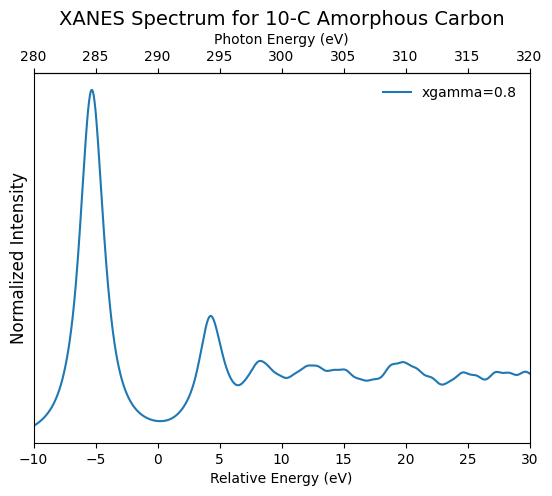

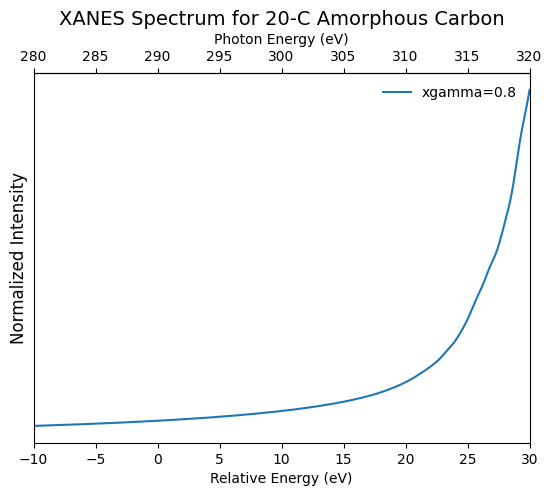

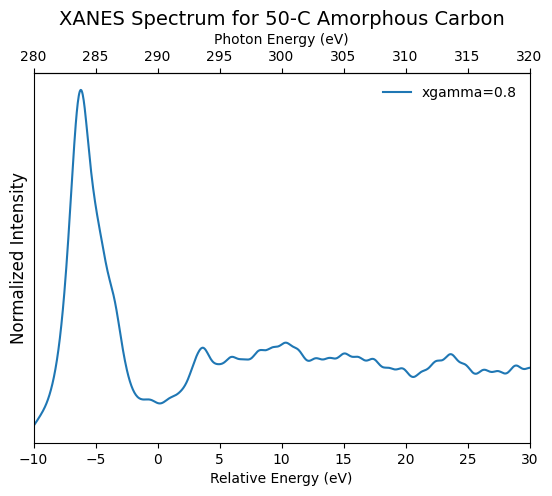

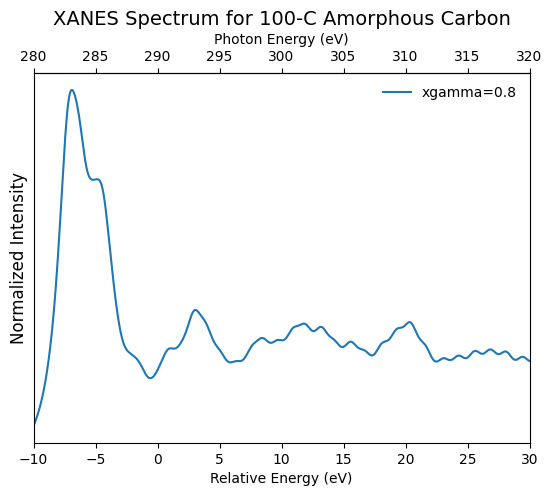

In [3]:
# plot individual spectra for various number of atoms (xgamma=1, single absorbing atom)
with chdir("XANES/data/aC261/"):
    vi.plot_XANES("aC1_10.xspectra.dat", "10-C Amorphous Carbon", 290)
    vi.plot_XANES("aC1_20.xspectra.dat", "20-C Amorphous Carbon", 290)
    vi.plot_XANES("aC1_50.xspectra.dat", "50-C Amorphous Carbon", 290)
    vi.plot_XANES("aC1_100.xspectra.dat", "100-C Amorphous Carbon", 290)
    #vi.plot_XANES("aC1_200.xspectra.dat", "200-C Amorphous Carbon", 290)

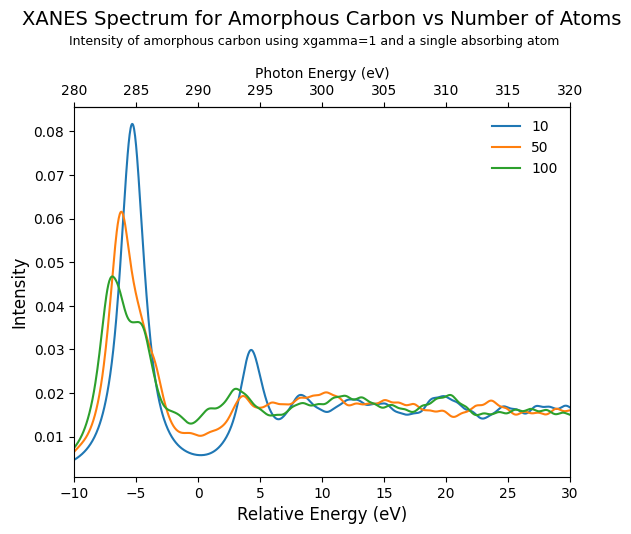

In [4]:
# plot spectra together
with chdir("XANES/data/aC261/"):
    e, s1 = vi.extract_XANES_data("aC1_10.xspectra.dat")
    #_, s2 = vi.extract_XANES_data("aC1_20.xspectra.dat")
    _, s3 = vi.extract_XANES_data("aC1_50.xspectra.dat")
    _, s4 = vi.extract_XANES_data("aC1_100.xspectra.dat")

    fig, ax1 = plt.subplots()

    plt.xlim(-10, 30)

    ax1.plot(e, s1, linestyle='-', label='10')
    #ax1.plot(e, s2, linestyle='-', label='20')
    ax1.plot(e, s3, linestyle='-', label='50')
    ax1.plot(e, s4, linestyle='-', label='100')

    ax1.set_xlabel("Relative Energy (eV)", fontsize=12)
    ax1.set_ylabel("Intensity", fontsize=12)
    #ax1.set_yticks([])
    ax1.legend(frameon=False)

    ax2 = ax1.secondary_xaxis('top')
    ax2.set_xlabel("Photon Energy (eV)")
    ticks = [-10, -5, 0, 5, 10, 15, 20, 25, 30]
    ax2.set_xticks(ticks) 
    ax2.set_xticklabels([x + 290 for x in ticks]) 

    plt.title("XANES Spectrum for Amorphous Carbon vs Number of Atoms", fontsize=14, y = 1.2)
    plt.suptitle("Intensity of amorphous carbon using xgamma=1 and a single absorbing atom", y=1.03, fontsize=9)
    plt.show()

## XANES Spectra

### Diamond

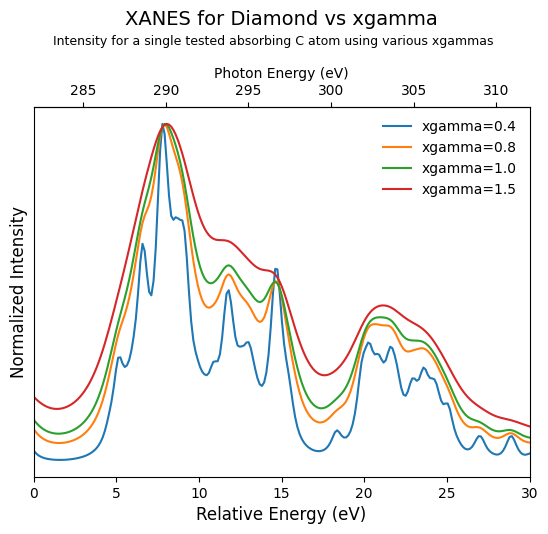

In [5]:
# diamond vs xgamma for single absorbing atom

with chdir("XANES/data/diamond/"):
    rel_energy, sigma1 = vi.extract_XANES_data("diamond_0.4.xspectra.dat")
    _, sigma2 = vi.extract_XANES_data("diamond_0.8.xspectra.dat")
    _, sigma3 = vi.extract_XANES_data("diamond_1.xspectra.dat")
    _, sigma4 = vi.extract_XANES_data("diamond_1.5.xspectra.dat")

    sigma1 = vi.normalize_intensity(sigma1)
    sigma2 = vi.normalize_intensity(sigma2)
    sigma3 = vi.normalize_intensity(sigma3)
    sigma4 = vi.normalize_intensity(sigma4)

    fig, ax1 = plt.subplots()

    plt.xlim(0, 30)

    ax1.plot(rel_energy, sigma1, linestyle='-', label='xgamma=0.4')
    ax1.plot(rel_energy, sigma2, linestyle='-', label='xgamma=0.8')
    ax1.plot(rel_energy, sigma3, linestyle='-', label='xgamma=1.0')
    ax1.plot(rel_energy, sigma4, linestyle='-', label='xgamma=1.5')

    ax1.set_xlabel("Relative Energy (eV)", fontsize=12)
    ax1.set_ylabel("Normalized Intensity", fontsize=12)
    ax1.set_yticks([])
    ax1.legend(frameon=False)

    ax2 = ax1.secondary_xaxis('top')
    ax2.set_xlabel("Photon Energy (eV)")
    ticks = [3, 8, 13, 18, 23, 28, 33]
    ax2.set_xticks(ticks) 
    ax2.set_xticklabels([x + 282 for x in ticks]) 

    plt.title("XANES for Diamond vs xgamma", fontsize=14, y = 1.2)
    plt.suptitle("Intensity for a single tested absorbing C atom using various xgammas", y=1.03, fontsize=9)
    plt.show()

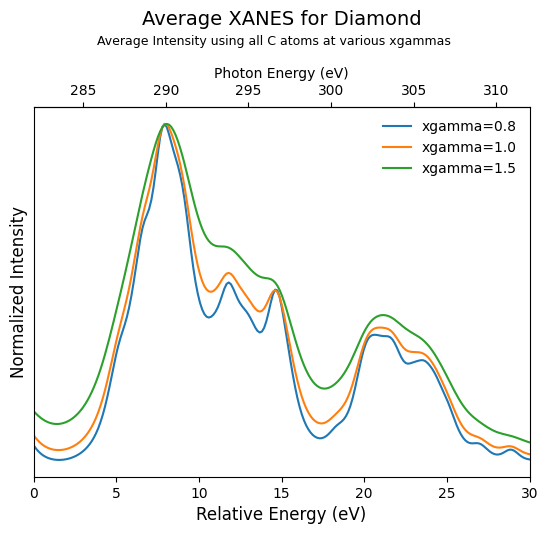

In [6]:
# average diamond XANES
with chdir("XANES/data/diamond/"):
    avg_e, avg_s1 = vi.average_XANES(["avg_diamond_0.81.xspectra.dat", "avg_diamond_0.82.xspectra.dat", "avg_diamond_0.83.xspectra.dat",
                     "avg_diamond_0.84.xspectra.dat", "avg_diamond_0.85.xspectra.dat", "avg_diamond_0.86.xspectra.dat",
                     "avg_diamond_0.87.xspectra.dat", "avg_diamond_0.88.xspectra.dat"])
    _, avg_s2 = vi.average_XANES(["avg_diamond_11.xspectra.dat", "avg_diamond_12.xspectra.dat", "avg_diamond_13.xspectra.dat",
                     "avg_diamond_14.xspectra.dat", "avg_diamond_15.xspectra.dat", "avg_diamond_16.xspectra.dat",
                     "avg_diamond_17.xspectra.dat", "avg_diamond_18.xspectra.dat"])
    _, avg_s3 = vi.average_XANES(["avg_diamond_1.51.xspectra.dat", "avg_diamond_1.52.xspectra.dat", "avg_diamond_1.53.xspectra.dat",
                     "avg_diamond_1.54.xspectra.dat", "avg_diamond_1.55.xspectra.dat", "avg_diamond_1.56.xspectra.dat",
                     "avg_diamond_1.57.xspectra.dat", "avg_diamond_1.58.xspectra.dat"])
    
    avg_s1 = vi.normalize_intensity(avg_s1)
    avg_s2 = vi.normalize_intensity(avg_s2)
    avg_s3 = vi.normalize_intensity(avg_s3)

    fig, ax1 = plt.subplots()

    plt.xlim(0, 30)

    ax1.plot(avg_e, avg_s1, linestyle='-', label='xgamma=0.8')
    ax1.plot(avg_e, avg_s2, linestyle='-', label='xgamma=1.0')
    ax1.plot(avg_e, avg_s3, linestyle='-', label='xgamma=1.5')

    ax1.set_xlabel("Relative Energy (eV)", fontsize=12)
    ax1.set_ylabel("Normalized Intensity", fontsize=12)
    ax1.set_yticks([])
    ax1.legend(frameon=False)

    ax2 = ax1.secondary_xaxis('top')
    ax2.set_xlabel("Photon Energy (eV)")
    ticks = [3, 8, 13, 18, 23, 28, 33]
    ax2.set_xticks(ticks) 
    ax2.set_xticklabels([x + 282 for x in ticks]) 

    plt.title("Average XANES for Diamond", fontsize=14, y = 1.2)
    plt.suptitle("Average Intensity using all C atoms at various xgammas", y=1.03, fontsize=9)
    plt.show()
    

### Amorphous Carbon

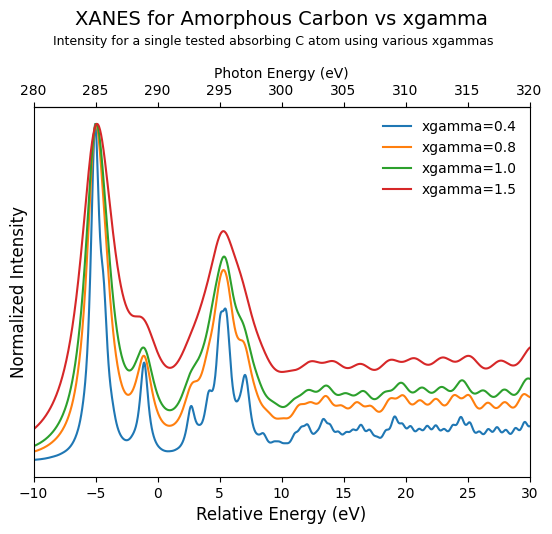

In [7]:
# amorphous carbon vs xgamma
with chdir("XANES/data/aC20/"):
    rel_energy, sigma1 = vi.extract_XANES_data("aC_0.4.xspectra.dat")
    _, sigma2 = vi.extract_XANES_data("aC_0.8.xspectra.dat")
    _, sigma3 = vi.extract_XANES_data("aC_1.xspectra.dat")
    _, sigma4 = vi.extract_XANES_data("aC_1.5.xspectra.dat")

    sigma1 = vi.normalize_intensity(sigma1)
    sigma2 = vi.normalize_intensity(sigma2)
    sigma3 = vi.normalize_intensity(sigma3)
    sigma4 = vi.normalize_intensity(sigma4)

    fig, ax1 = plt.subplots()

    plt.xlim(-10, 30)

    ax1.plot(rel_energy, sigma1, linestyle='-', label='xgamma=0.4')
    ax1.plot(rel_energy, sigma2, linestyle='-', label='xgamma=0.8')
    ax1.plot(rel_energy, sigma3, linestyle='-', label='xgamma=1.0')
    ax1.plot(rel_energy, sigma4, linestyle='-', label='xgamma=1.5')

    ax1.set_xlabel("Relative Energy (eV)", fontsize=12)
    ax1.set_ylabel("Normalized Intensity", fontsize=12)
    ax1.set_yticks([])
    ax1.legend(frameon=False)

    ax2 = ax1.secondary_xaxis('top')
    ax2.set_xlabel("Photon Energy (eV)")
    ticks = [-10, -5, 0, 5, 10, 15, 20, 25, 30]
    ax2.set_xticks(ticks) 
    ax2.set_xticklabels([x + 290 for x in ticks]) 

    plt.title("XANES for Amorphous Carbon vs xgamma", fontsize=14, y = 1.2)
    plt.suptitle("Intensity for a single tested absorbing C atom using various xgammas", y=1.03, fontsize=9)
    plt.show()

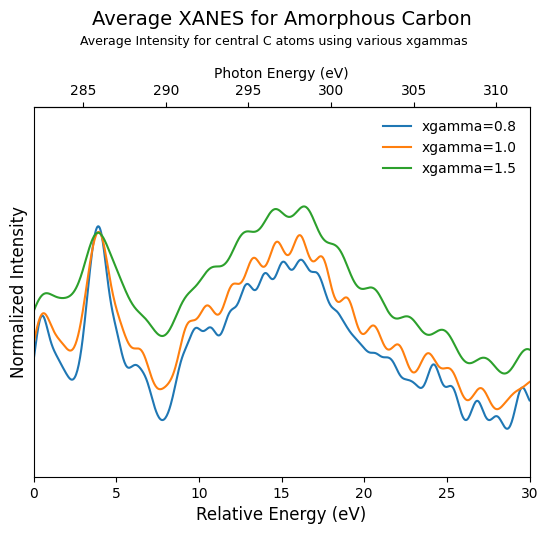

In [8]:
# average amorphous carbon XANES
with chdir("XANES/data/aC20/"):
    avg_e, avg_s1 = vi.average_XANES(["avg_aC_0.812.xspectra.dat", "avg_aC_0.813.xspectra.dat", "avg_aC_0.818.xspectra.dat"])
    _, avg_s2 = vi.average_XANES(["avg_aC_112.xspectra.dat", "avg_aC_113.xspectra.dat", "avg_aC_118.xspectra.dat"])
    _, avg_s3 = vi.average_XANES(["avg_aC_1.512.xspectra.dat", "avg_aC_1.513.xspectra.dat", "avg_aC_1.518.xspectra.dat"])
    
    avg_s1 = vi.normalize_intensity(avg_s1)
    avg_s2 = vi.normalize_intensity(avg_s2)
    avg_s3 = vi.normalize_intensity(avg_s3)

    fig, ax1 = plt.subplots()

    plt.xlim(0, 30)

    ax1.plot(avg_e, avg_s1, linestyle='-', label='xgamma=0.8')
    ax1.plot(avg_e, avg_s2, linestyle='-', label='xgamma=1.0')
    ax1.plot(avg_e, avg_s3, linestyle='-', label='xgamma=1.5')

    ax1.set_xlabel("Relative Energy (eV)", fontsize=12)
    ax1.set_ylabel("Normalized Intensity", fontsize=12)
    ax1.set_yticks([])
    ax1.legend(frameon=False)

    ax2 = ax1.secondary_xaxis('top')
    ax2.set_xlabel("Photon Energy (eV)")
    ticks = [3, 8, 13, 18, 23, 28, 33]
    ax2.set_xticks(ticks) 
    ax2.set_xticklabels([x + 282 for x in ticks]) 

    plt.title("Average XANES for Amorphous Carbon", fontsize=14, y = 1.2)
    plt.suptitle("Average Intensity for central C atoms using various xgammas", y=1.03, fontsize=9)
    plt.show()

### Diamond vs Amorphous Carbon

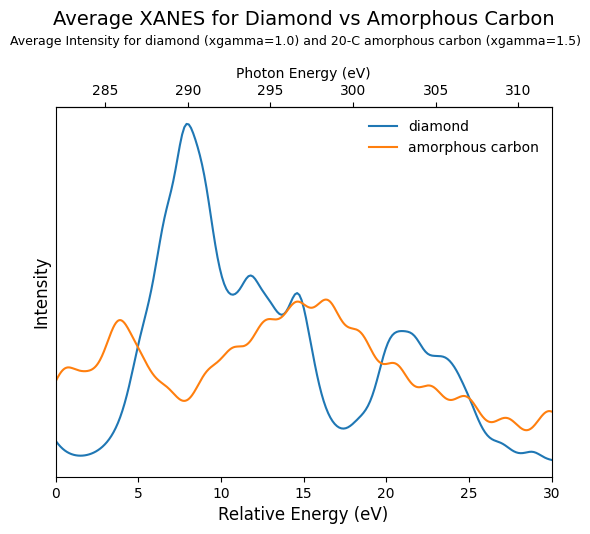

In [9]:
# compare diamond vs 20-C amorphous carbon vs 216-C amorphous carbon
with chdir("XANES/data/"):
    avg_e1, avg_s1 = vi.average_XANES(["diamond/avg_diamond_11.xspectra.dat", "diamond/avg_diamond_12.xspectra.dat", "diamond/avg_diamond_13.xspectra.dat",
                     "diamond/avg_diamond_14.xspectra.dat", "diamond/avg_diamond_15.xspectra.dat", "diamond/avg_diamond_16.xspectra.dat",
                     "diamond/avg_diamond_17.xspectra.dat", "diamond/avg_diamond_18.xspectra.dat"])
    avg_e2, avg_s2 = vi.average_XANES(["aC20/avg_aC_1.512.xspectra.dat", "aC20/avg_aC_1.513.xspectra.dat", "aC20/avg_aC_1.518.xspectra.dat"])
    
    avg_s1 = vi.normalize_intensity(avg_s1)
    avg_s2 = vi.normalize_intensity(avg_s2)

    avg_s2 = [x - 0.3 for x in avg_s2]

    fig, ax1 = plt.subplots()

    plt.xlim(0, 30)

    ax1.plot(avg_e1, avg_s1, linestyle='-', label='diamond')
    ax1.plot(avg_e2, avg_s2, linestyle='-', label='amorphous carbon')

    ax1.set_xlabel("Relative Energy (eV)", fontsize=12)
    ax1.set_ylabel("Intensity", fontsize=12)
    ax1.set_yticks([])
    ax1.legend(frameon=False)

    ax2 = ax1.secondary_xaxis('top')
    ax2.set_xlabel("Photon Energy (eV)")
    ticks = [3, 8, 13, 18, 23, 28, 33]
    ax2.set_xticks(ticks) 
    ax2.set_xticklabels([x + 282 for x in ticks]) 

    plt.title("Average XANES for Diamond vs Amorphous Carbon", fontsize=14, y = 1.2)
    plt.suptitle("Average Intensity for diamond (xgamma=1.0) and 20-C amorphous carbon (xgamma=1.5)", y=1.03, fontsize=9)
    plt.show()

## XPS Spectra

### Pyridine (Example)

In [11]:
# create input
with chdir("XPS/data/pyridine/"):
    vi.xps_input(prefix = "pyridine", atweight=[1, 2, 2], nat=3, erangexps=(-5,5), etotfch=[-89.728, -89.743, -89.705], nptxps=201, delorentz=0.2, degauss=0.2, lorentzratio=0.5)

Number of inequivalent atoms:  3


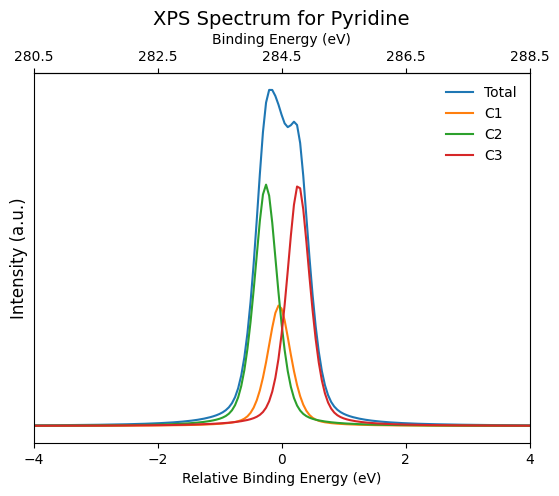

In [ ]:
# plot XPS pyridine
with chdir("XPS/data/pyridine/"):
    energy, intensity = vi.extract_XPS_data("pyridine.XPS.dat")
    print("Number of inequivalent atoms: ", len(intensity)-1)

    total_intensity = intensity[0]
    intensity1 = intensity[1]
    intensity2 = intensity[2]
    intensity3 = intensity[3]

    fig, ax1 = plt.subplots()

    plt.xlim(-4, 4)
    ax1.set_xticks([-4, -2, 0, 2, 4])
    ax1.set_yticks([])

    ax1.plot(energy, total_intensity, linestyle='-', label='Total')
    ax1.plot(energy, intensity1, linestyle='-', label='C1')
    ax1.plot(energy, intensity2, linestyle='-', label='C2')
    ax1.plot(energy, intensity3, linestyle='-', label='C3')

    ax1.set_xlabel("Relative Binding Energy (eV)")
    ax1.set_ylabel("Intensity (a.u.)", fontsize=12)

    ax1.legend(frameon=False)

    ax2 = ax1.secondary_xaxis('top')
    ax2.set_xlabel("Binding Energy (eV)")
    ticks = [-4, -2, 0, 2, 4]
    ax2.set_xticks(ticks) 
    ax2.set_xticklabels([x + 284.5 for x in ticks]) 

    plt.title("XPS Spectrum for Pyridine", fontsize=14)
    plt.show()

### Diamond

In [ ]:
# create input
with chdir("XPS/data/diamond/"):
    vi.xps_input(prefix = "diamond", atweight=[8], nat=1, erangexps=(-5,5), etotfch=[-100.04861256], nptxps=201, delorentz=0.2, degauss=0.2, lorentzratio=0.5)

Number of inequivalent atoms:  1


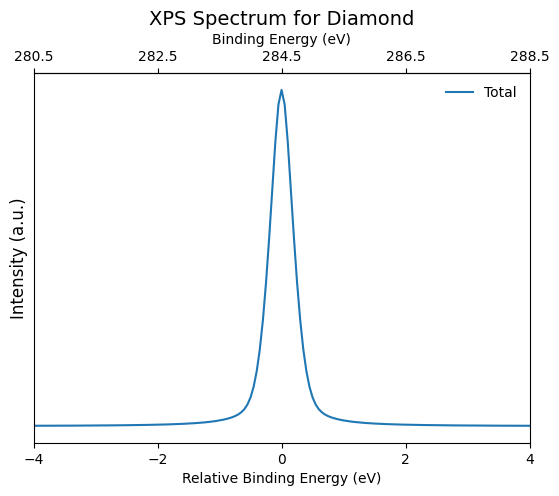

In [ ]:
# plot XPS diamond
with chdir("XPS/data/diamond/"):
    energy, intensity = vi.extract_XPS_data("diamond.XPS.dat")
    print("Number of inequivalent atoms: ", len(intensity)-1)

    total_intensity = intensity[0]
    intensity1 = intensity[1]

    fig, ax1 = plt.subplots()

    plt.xlim(-4, 4)
    ax1.set_yticks([])
    ax1.set_xticks([-4, -2, 0, 2, 4])

    ax1.plot(energy, total_intensity, linestyle='-', label='Total')
    #ax1.plot(energy, intensity1, linestyle='-', label='C1')

    ax1.set_xlabel("Relative Binding Energy (eV)")
    ax1.set_ylabel("Intensity (a.u.)", fontsize=12)

    ax1.legend(frameon=False)

    ax2 = ax1.secondary_xaxis('top')
    ax2.set_xlabel("Binding Energy (eV)")
    ticks = [-4, -2, 0, 2, 4]
    ax2.set_xticks(ticks) 
    ax2.set_xticklabels([x + 284.5 for x in ticks]) 

    plt.title("XPS Spectrum for Diamond", fontsize=14)
    plt.show()

**Diamond XPS:**
https://www.researchgate.net/figure/C1s-XPS-spectra-of-the-diamond-a-as-grown-sample-b-after-heating-at-600C-for-30-min_fig10_223562307 

**Pyridine XPS:**
https://pubs.aip.org/aip/jcp/article/162/8/084111/3337296/The-XPS-of-pyridine-A-combined-theoretical-and?searchresult=1

### Amorphous Carbon

In [ ]:
# create input
with chdir("XPS/data/aC/"):